## Continuación Métodos Numéricos de Integración de Ecuaciones Diferenciales Ordinarias
**Taller de Modelación Numérica** <br>
Facultad de Ciencias, UNAM <br>
Semestre 2022-2

En este notebook veremos ejemplos de soluciones numércias a dos ecuaciones diferenciales ordinarias (EDO) el método Runge-Kutta orden 4 y utilizando la función `solve_ivp` del paquete scipy.

Al final del notebook encontrarás el ejercicio de tarea correspondiente. Entrega tu solución en un notebook junto con los ejercicios del notebook 04_soluciones_EDOs.ipynb en la carpeta de Classroom con el nombre `apellido_nombre_tarea04_EDOs.ipynb`.

### Ejemplo 1: Runge-Kutta 4

Resolvamos la ecuación
$$y' = y - t^2 + 1$$

con condición inicial $$y(0) = 0.5$$

In [1]:
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Ejemplo 1 Métodos de Runge-Kutta

Ahora resolvamos la misma ecuación que en el ejemplo 1 del método de Euler usando Runge-Kutta 4: $$ y'=y - t^2 + 1$$ con $$y(0) = 0.5$$

In [2]:
h = 0.01 # Paso de tiempo
t = 0
y = 0.5 
print('Paso 0: t = %6.3f, y = %18.15f\n' %(t, y))

TRK1 = np.empty(int(5/h))
YRK1 = np.empty(int(5/h))

for ii in range(int(5/h)):
    k1 = h * (y - t**2 + 1)              # h*f(t,y);
    k2 = h * ((y+k1/2) - (t+h/2)**2 + 1) # h*f(t+h/2, y+k1/2);
    k3 = h * ((y+k2/2) - (t+h/2)**2 + 1) # h*f(t+h/2, y+k2/2);
    k4 = h * ((y+k3) - (t+h)**2 + 1)     # h*f(t+h, y+k3);
    y = y + (k1 + 2*k2 + 2*k3 + k4)/6
    t = t + h
    TRK1[ii] = t
    YRK1[ii] = y    
    print('Paso %d: t = %6.3f, y = %18.15f\n' % (ii, t, y))

Paso 0: t =  0.000, y =  0.500000000000000

Paso 0: t =  0.010, y =  0.515074916456250

Paso 1: t =  0.020, y =  0.530299329983278

Paso 2: t =  0.030, y =  0.545672733018206

Paso 3: t =  0.040, y =  0.561194612897066

Paso 4: t =  0.050, y =  0.576864451803532

Paso 5: t =  0.060, y =  0.592681726717134

Paso 6: t =  0.070, y =  0.608645909360964

Paso 7: t =  0.080, y =  0.624756466148837

Paso 8: t =  0.090, y =  0.641012858131942

Paso 9: t =  0.100, y =  0.657414540944942

Paso 10: t =  0.110, y =  0.673960964751534

Paso 11: t =  0.120, y =  0.690651574189474

Paso 12: t =  0.130, y =  0.707485808315028

Paso 13: t =  0.140, y =  0.724463100546890

Paso 14: t =  0.150, y =  0.741582878609512

Paso 15: t =  0.160, y =  0.758844564475886

Paso 16: t =  0.170, y =  0.776247574309731

Paso 17: t =  0.180, y =  0.793791318407118

Paso 18: t =  0.190, y =  0.811475201137492

Paso 19: t =  0.200, y =  0.829298620884114

Paso 20: t =  0.210, y =  0.847260969983894

Paso 21: t =  0.220, 

In [3]:
# Sol. analítica
YARK1 = 2*TRK1 - np.exp(TRK1)/2 + TRK1**2 + 1 

Text(0.5, 1.0, 'Diferencia entre RK 4 y solución analítica')

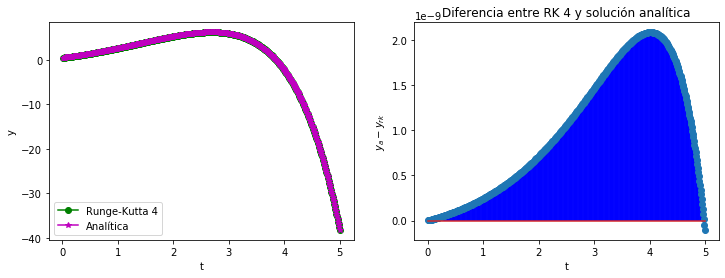

In [4]:
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(12,4))

ax0.plot(TRK1,YRK1,'-og', label='Runge-Kutta 4')
ax0.plot(TRK1,YARK1,'-*m',label='Analítica')
ax0.set_xlabel('t')
ax0.set_ylabel('y')
ax0.legend()

ax1.stem(TRK1,YARK1-YRK1,'b',use_line_collection=True)
ax1.set_xlabel('t')
ax1.set_ylabel(r'$y_a-y_{rk}$')
ax1.set_title('Diferencia entre RK 4 y solución analítica') 

### Ejemplo 2 Runge-Kutta

Ahora resolvamos la misma ecuación que en el ejemplo 2 del método de Euler usando Runge-Kutta 4:
    $$y'= sin(t)$$
    $$y(0) = -1.$$

In [5]:
h=0.01;   # este es el incremento de tiempo o del_t
t = 0;   # tiempo inicial o t0
y = -1;  # valor de y en t0
print('Paso 0: t = %6.3f, y = %18.15f\n' %(t, y))

Paso 0: t =  0.000, y = -1.000000000000000



In [6]:
def RK_f(a,b):
    return(np.sin(a))

In [7]:
TRK2 = np.empty(ceil(4*np.pi/h))
YRK2 = np.empty(ceil(4*np.pi/h))

for ii in range(ceil(4*np.pi/h)):
    k1 = h * RK_f(t, y)              # h*f(t,y);
    k2 = h * RK_f(t+h/2, y+k1/2)     # h*f(t+h/2, y+k1/2);
    k3 = h * RK_f(t+h/2, y+k2/2)     # h*f(t+h/2, y+k2/2);
    k4 = h * RK_f(t+h, y+k3)        # h*f(t+h, y+k3);
    y = y + (k1 + 2*k2 + 2*k3 + k4)/6
    t = t + h
    TRK2[ii] = t
    YRK2[ii] = y
    print('Paso %d: t = %6.3f, y = %18.15f\n' %(ii, t, y))

Paso 0: t =  0.010, y = -0.999950000416665

Paso 1: t =  0.020, y = -0.999800006666577

Paso 2: t =  0.030, y = -0.999550033748986

Paso 3: t =  0.040, y = -0.999200106660975

Paso 4: t =  0.050, y = -0.998750260394962

Paso 5: t =  0.060, y = -0.998200539935198

Paso 6: t =  0.070, y = -0.997551000253271

Paso 7: t =  0.080, y = -0.996801706302608

Paso 8: t =  0.090, y = -0.995952733011980

Paso 9: t =  0.100, y = -0.995004165278009

Paso 10: t =  0.110, y = -0.993956097956676

Paso 11: t =  0.120, y = -0.992808635853841

Paso 12: t =  0.130, y = -0.991561893714759

Paso 13: t =  0.140, y = -0.990215996212603

Paso 14: t =  0.150, y = -0.988771077936003

Paso 15: t =  0.160, y = -0.987227283375583

Paso 16: t =  0.170, y = -0.985584766909511

Paso 17: t =  0.180, y = -0.983843692788065

Paso 18: t =  0.190, y = -0.982004235117208

Paso 19: t =  0.200, y = -0.980066577841173

Paso 20: t =  0.210, y = -0.978030914724072

Paso 21: t =  0.220, y = -0.975897449330522

Paso 22: t =  0.230,

Paso 1015: t = 10.160, y =  0.741681838466964

Paso 1016: t = 10.170, y =  0.734937347929110

Paso 1017: t = 10.180, y =  0.728119364268909

Paso 1018: t = 10.190, y =  0.721228569279047

Paso 1019: t = 10.200, y =  0.714265652033278

Paso 1020: t = 10.210, y =  0.707231308817526

Paso 1021: t = 10.220, y =  0.700126243060249

Paso 1022: t = 10.230, y =  0.692951165262104

Paso 1023: t = 10.240, y =  0.685706792924890

Paso 1024: t = 10.250, y =  0.678393850479805

Paso 1025: t = 10.260, y =  0.671013069214998

Paso 1026: t = 10.270, y =  0.663565187202446

Paso 1027: t = 10.280, y =  0.656050949224143

Paso 1028: t = 10.290, y =  0.648471106697625

Paso 1029: t = 10.300, y =  0.640826417600829

Paso 1030: t = 10.310, y =  0.633117646396293

Paso 1031: t = 10.320, y =  0.625345563954714

Paso 1032: t = 10.330, y =  0.617510947477860

Paso 1033: t = 10.340, y =  0.609614580420848

Paso 1034: t = 10.350, y =  0.601657252413806

Paso 1035: t = 10.360, y =  0.593639759182902

Paso 1036: t 

In [8]:
YARK2 = -np.cos(TRK2) # solución analítica

Text(0.5, 1.0, 'Diferencia entre RK4 y solución analítica')

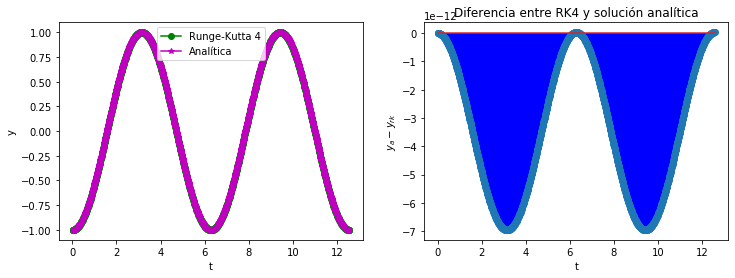

In [9]:
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(12,4))

ax0.plot(TRK2,YRK2,'-og', label='Runge-Kutta 4')
ax0.plot(TRK2,YRK2,'-*m',label='Analítica')
ax0.set_xlabel('t')
ax0.set_ylabel('y')
ax0.legend()

ax1.stem(TRK2,YARK2-YRK2,'b',use_line_collection=True)
ax1.set_xlabel('t')
ax1.set_ylabel(r'$y_a-y_{rk}$')
ax1.set_title('Diferencia entre RK4 y solución analítica')

### Funciones de python para resolver Problemas de valores iniciales (IVP)

EL paquete scipy de python contiene módulos para resolver EDOs con rutinas mucho más precisas que el método de Euler.
La función recomendada para resolver problemas como los ejemplos anteriores (ojo, no es la única) es [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html?highlight=s).

Como su nombre lo indica, esta función resuelve numéricamente el problema de valores iniciales para un sistema de EDOs de la forma
$$y' = f(t, y),$$
$$y(t_0) = y_0$$

Donde $t$ es la variable independiente, $y(t)$ es un vector de N dimensiones y $f(t,y)$ es una función vector de N dimensiones que determina las ecuaciones diferenciales. 

El método que esta función usa por default es Runge-Kutta 4, pero se puede elegir de entre 5 métodos distintos. Consulta la [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html?highlight=s) para más detalles acerca de `solve_ivp`.

In [10]:
# %% Importamos la función solve_ivp del módulo integrate del paquete scipy
from scipy.integrate import solve_ivp

# %% Definimos una función derivada (en este caso la misma que en el ejemplo 1)
def f(t, y):
    dydt = y-t**2+1
    return dydt


# %% Definimos el intervalo de tiempo y el valor inicial de la función y(t0).
t_intervalo = np.linspace(0, 5, 50)  # un vector de dimensiones (1,50) que comienza en cero y va hasta 5 
y_0 = np.array([0.5]) # 1D

# %% Resolvemos la ecuación diferencial
sol = solve_ivp(f, [t_intervalo[0], t_intervalo[-1]], y_0, t_eval=t_intervalo)

Comparemos los métodos:

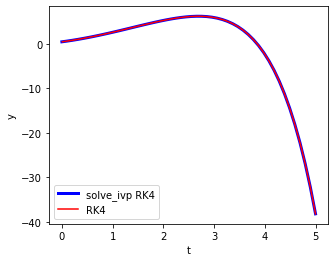

In [11]:
fig,ax = plt.subplots(1,1, figsize=(5,4))
ax.plot(sol.t, sol.y[0],'b-',label='solve_ivp RK4',linewidth=3)
ax.plot(TRK1,YRK1,'r-', label='RK4')
ax.set_ylabel('y')
ax.set_xlabel('t')
ax.legend()

### Ejercicios de la Tarea 4 (parte 2)

1. Considera la ecuación diferencial $y’ = cos(t) + sin(t)$ con $y(t=0) = 1$ y $h=0.1$. Escribe un código para calcular la solución con el método de Runge-Kutta de orden 4 para el intervalo de 0 a $2\pi$.

2. Considera la ecuación diferencial $$y'=\frac{2y}{t}+t^2e^t$$ con $y(-2) = -10$..
    
    a) Calcula la solución analítica. Puedes utilizar algún programa en línea. <br>
    b) Escribe un código para calcular la solución con el método de Euler en el intervalo $\left[-2, 0\right)$.<br>
    c) Escribe un código para calcular la solución con el método de Runge-Kutta 2 en el intervalo $\left[-2, 0\right)$.<br>
    d) Calcula también la solución usando el método de Runge-Kutta 4 en el mismo intervalo.<br>
    e) En una figura muestra las soluciones analítica, de Euler y Runge-Kutta 2 y 4, con la leyenda correspondiente.<br>
    f) En otra figura grafica los errores de cada método numérico al compararlos con la solución analítica. <br>
NOTA: Usar un paso de tiempo: h=0.1